# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

complete_pyma_df = study_results.merge(mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview

complete_pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(complete_pyma_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_pyma_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_pyma_df[duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_pyma_df.drop(complete_pyma_df[complete_pyma_df['Mouse ID'] == 'g989'].index, inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
check = len(complete_pyma_df['Mouse ID'].unique()) 
check

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
statistics_groupby_mean = complete_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
statistics_groupby_mean.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'}, inplace=True)

statistics_groupby_median = complete_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
statistics_groupby_median.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'}, inplace=True)

statistics_groupby_variance = complete_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
statistics_groupby_variance.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'}, inplace=True)

statistics_groupby_stdev = complete_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
statistics_groupby_stdev.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'}, inplace=True)

statistics_groupby_SEM = complete_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()
statistics_groupby_SEM.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'}, inplace=True)

statistics_groupby_count = complete_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count().reset_index()
statistics_groupby_count.rename(columns={'Tumor Volume (mm3)':'Regimen Count'}, inplace=True)


statistics_summary = statistics_groupby_mean 

statistics_groupby_data = [statistics_groupby_median, statistics_groupby_variance,
                           statistics_groupby_stdev, statistics_groupby_SEM, statistics_groupby_count ] 

# Assemble the resulting series into a single summary DataFrame.
for frame in statistics_groupby_data:
    statistics_summary = statistics_summary.merge(frame, how='right')


statistics_summary
#statistics_groupby_mean

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Regimen Count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398,182


In [8]:
statistics_summary.sort_values(by= 'Regimen Count',ascending=False, inplace=True)

In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics = complete_pyma_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

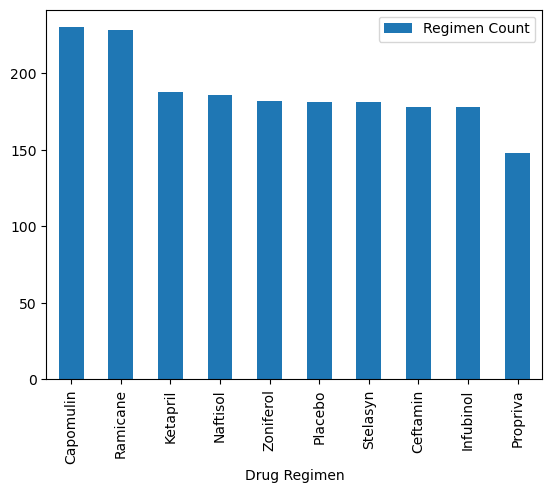

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

statistics_summary.plot(kind='bar', x='Drug Regimen', y='Regimen Count')

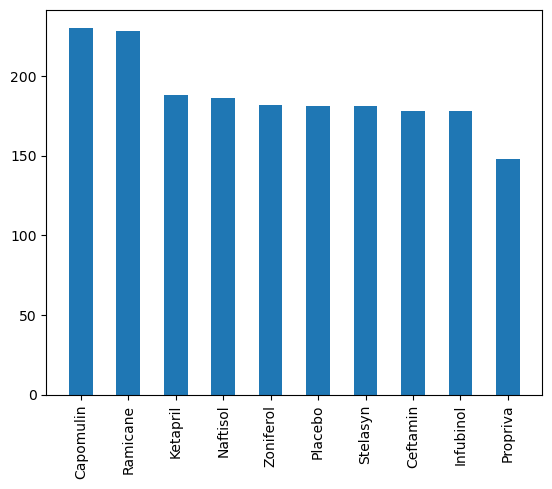

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = statistics_summary['Drug Regimen']
amount = statistics_summary['Regimen Count']

plt.figure(figsize=(6.4, 5))

plt.bar(regimen, amount, width=0.5)
plt.xticks(rotation=90)
plt.show()



In [12]:
male_female= complete_pyma_df.groupby("Sex")['Mouse ID'].count().reset_index()
male_female.rename(columns={"Mouse ID":"Total"}, inplace=True)

<AxesSubplot:title={'center':'Sex percentage'}, ylabel='Total'>

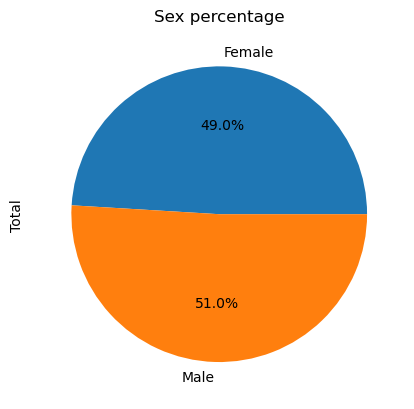

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female['Total'].plot(kind='pie', labels=male_female["Sex"], autopct='%1.1f%%', title='Sex percentage')

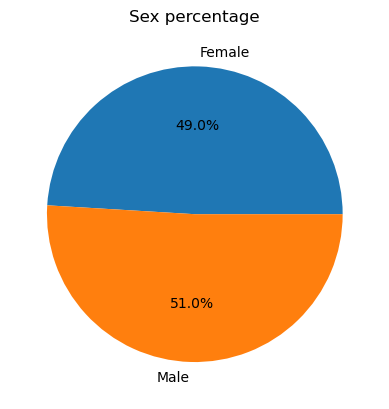

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.subplots()

plt.pie(male_female["Total"], labels=male_female["Sex"], autopct='%1.1f%%')
plt.title('Sex percentage')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = complete_pyma_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.merge(complete_pyma_df, how='left')
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Locate the rows which contain mice on each drug and get the tumor volumes
greatest_timepoint = greatest_timepoint[greatest_timepoint['Drug Regimen'].isin(regimens) == True]

In [16]:
# Create empty list to fill with tumor vol data (for plotting)
box_plot_summary = greatest_timepoint.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].sum().reset_index()

In [17]:
box_pivot = box_plot_summary.pivot_table(values='Tumor Volume (mm3)', index='Mouse ID', columns='Drug Regimen', aggfunc='sum')

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    q1 = box_pivot[regimen].quantile(0.25)
    q2 = box_pivot[regimen].quantile(0.5)
    q3 = box_pivot[regimen].quantile(0.75)
    iqr = q3 - q1 
    print('{}'.format(regimen))

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    potential_outliers = box_pivot[(box_pivot[regimen] < lower_bound) | (box_pivot[regimen] > upper_bound)]

    if len(potential_outliers) > 0:
        print('Potential Outliers:')
        print(potential_outliers)
    else:
        print('No Potential Outliers')
        
    print('\n')

Capomulin
No Potential Outliers


Ramicane
No Potential Outliers


Infubinol
Potential Outliers:
Drug Regimen  Capomulin  Ceftamin  Infubinol  Ramicane
Mouse ID                                              
c326                NaN       NaN  36.321346       NaN


Ceftamin
No Potential Outliers




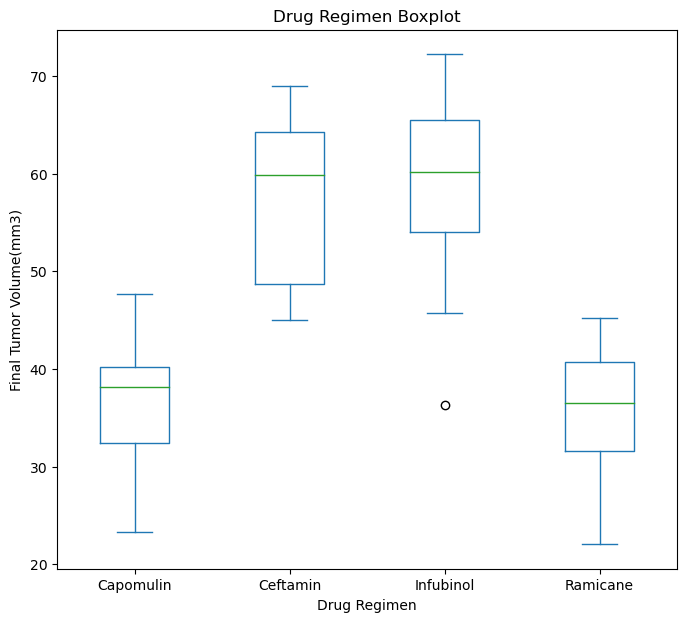

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bx = box_pivot.plot(
        kind='box',
        figsize=(8, 7)
        )
bx.set_title("Drug Regimen Boxplot")
bx.set_ylabel("Final Tumor Volume(mm3)")
bx.set_xlabel("Drug Regimen")

plt.show()

## Line and Scatter Plots

In [20]:
Capomulin_mice = complete_pyma_df.loc[complete_pyma_df['Drug Regimen'] == "Capomulin"]
Capomulin_mice_ID = Capomulin_mice['Mouse ID'].unique()
Mouse = random.choice(Capomulin_mice_ID)
Mouse

'i738'

In [21]:
line_plot_mouse = complete_pyma_df.loc[complete_pyma_df['Mouse ID'] == Mouse]
line_plot_mouse 
time_m= line_plot_mouse['Timepoint']
volume_m = line_plot_mouse['Tumor Volume (mm3)']


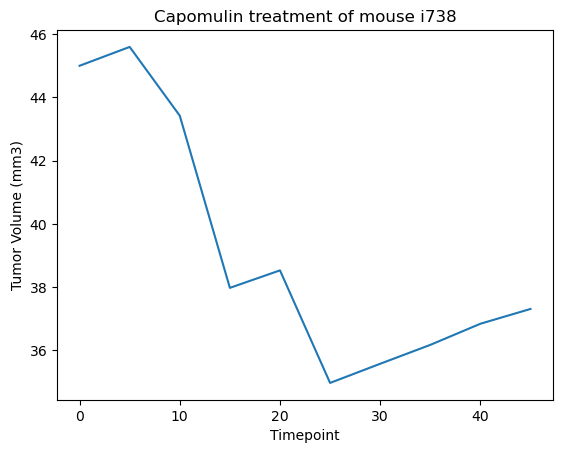

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(time_m, volume_m)
plt.title('Capomulin treatment of mouse {}'.format(Mouse))
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [23]:
scatter_plot_regimen = line_plot_mouse = complete_pyma_df.loc[complete_pyma_df['Drug Regimen'] == "Capomulin"]
scatter_plot_groupby = scatter_plot_regimen.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean', 'Weight (g)':'mean'})
volume_s = scatter_plot_groupby['Tumor Volume (mm3)']
weight_s = scatter_plot_groupby['Weight (g)']

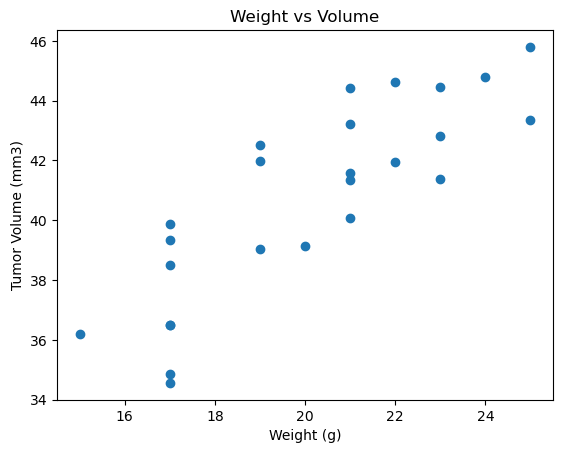

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight_s, volume_s)
plt.title('Weight vs Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [25]:
print(f"The correlation coefficient between Weight and Volume intensity is {round(st.pearsonr(weight_s,volume_s)[0],2)}")

The correlation coefficient between Weight and Volume intensity is 0.84


## Correlation and Regression

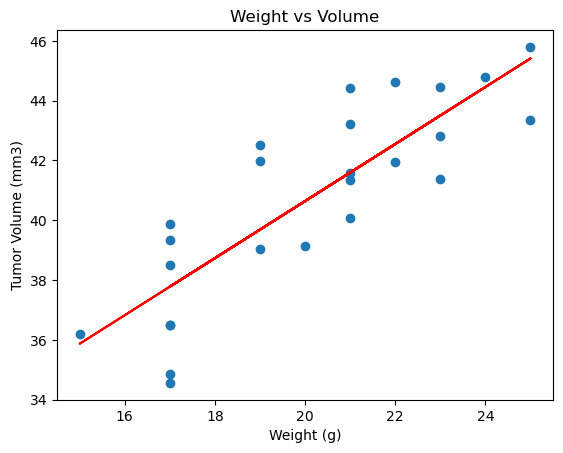

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight_s, volume_s)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_s, volume_s)
regress_values = weight_s * slope + intercept
plt.plot(weight_s, regress_values,"r-")
plt.title('Weight vs Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()